In [75]:
import pandas as pd
import numpy as np
import ast 
import json
import requests
from datetime import datetime
from datetime import date
import os
import sys
import time
import math
from thefuzz import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import nan
from scipy import interpolate

In [3]:

#merged_df['PlantName'] = merged_df['PlantName'].fillna("")
def fuzzy_match(row):
    return fuzz.token_set_ratio(row['CAMD_FACILITY_NAME'], row['PlantName'])  # or whatever threshold you want
    ## set back to facilityName if it's going to be used with merged_df,
    ## for stata_cw_1stmerge CAMD_FACILITY_NAME should be used
# Apply to each row
#merged_df['name_match'] = merged_df.apply(fuzzy_match, axis=1)
#merged_df.loc[merged_df['PlantName']=="",'name_match'] = 100

def chunker(seq, size):
    for pos in range(0, len(seq), size):
        yield seq[pos:pos + size]

In [119]:

filtered_df[filtered_df['efficiency']==0]

,stateCode,facilityName,CAMD_PLANT_ID,date,hour,grossLoad,heatInput,PlantID,PlantName,State,...,Enertype1,Summercap_plant,Wintercap_plant,Namecap_plant,name_match,bad match,weird match,gen_to_capacity,gen/cap-cats,efficiency
566,AL,Ascend (Decatur Plant),880041,2021-12-08,0,0.0,453.3,NaN,,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,unknown,0.0
567,AL,Ascend (Decatur Plant),880041,2021-12-08,1,0.0,461.8,NaN,,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,unknown,0.0
568,AL,Ascend (Decatur Plant),880041,2021-12-08,2,0.0,463.0,NaN,,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,unknown,0.0
569,AL,Ascend (Decatur Plant),880041,2021-12-08,3,0.0,467.1,NaN,,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,unknown,0.0
570,AL,Ascend (Decatur Plant),880041,2021-12-08,4,0.0,470.8,NaN,,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336645,WY,Wyodak,6101,2021-12-22,17,0.0,303.6,6101.0,Wyodak,WY,...,Coal,332.0,335.0,402.299988,1,0,False,0.0,5%>gen/cap,0.0
336646,WY,Wyodak,6101,2021-12-22,18,0.0,300.0,6101.0,Wyodak,WY,...,Coal,332.0,335.0,402.299988,1,0,False,0.0,5%>gen/cap,0.0
336647,WY,Wyodak,6101,2021-12-22,19,0.0,295.2,6101.0,Wyodak,WY,...,Coal,332.0,335.0,402.299988,1,0,False,0.0,5%>gen/cap,0.0
336648,WY,Wyodak,6101,2021-12-22,20,0.0,265.3,6101.0,Wyodak,WY,...,Coal,332.0,335.0,402.299988,1,0,False,0.0,5%>gen/cap,0.0


## what do next?
I think one thing that would be good to do ist to add another column of capacity of each generator, and then we would only keep observations with $\frac{gen}{cap}$ between $85-95\%$, or we  can also have efficiency dispersion histogram the same as Omer's

/tmp/ipykernel_1800902/389218312.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  stata_cw_1stmerge.loc[stata_cw_1stmerge['name_match']>50,"bad match"] =0
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

file year-5-3 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


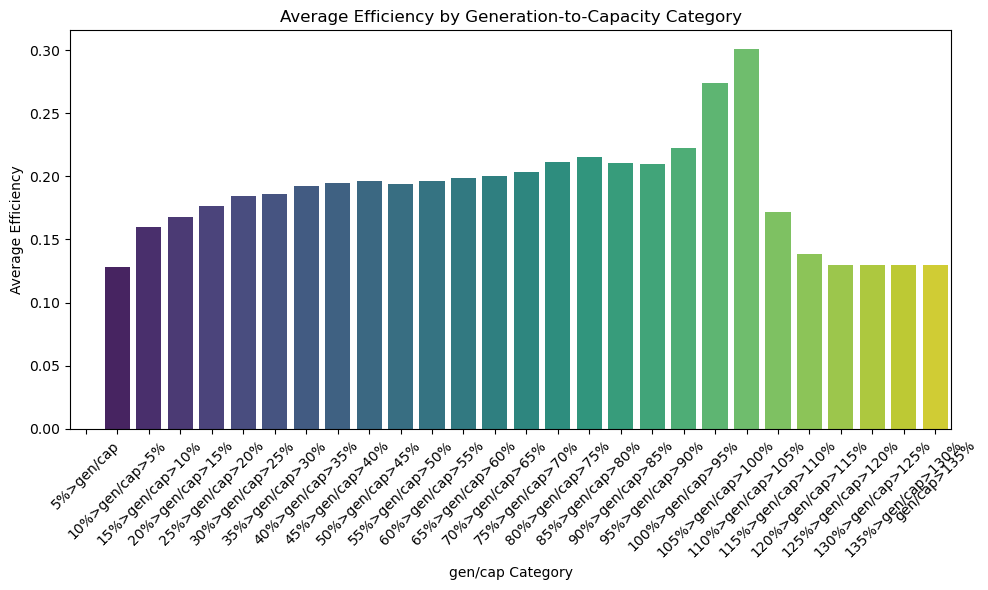

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year-4-3 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


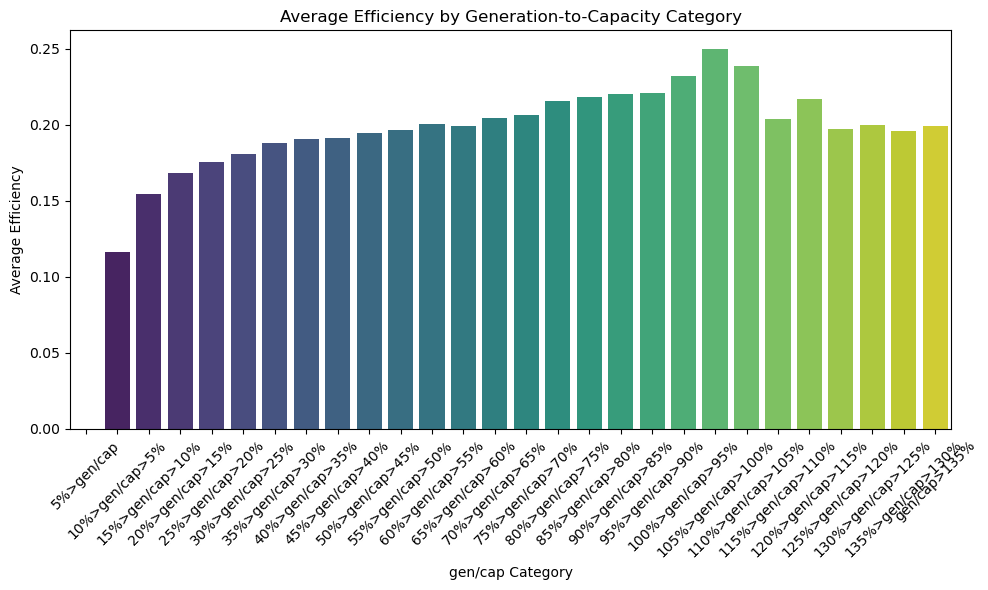

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year-3-11 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


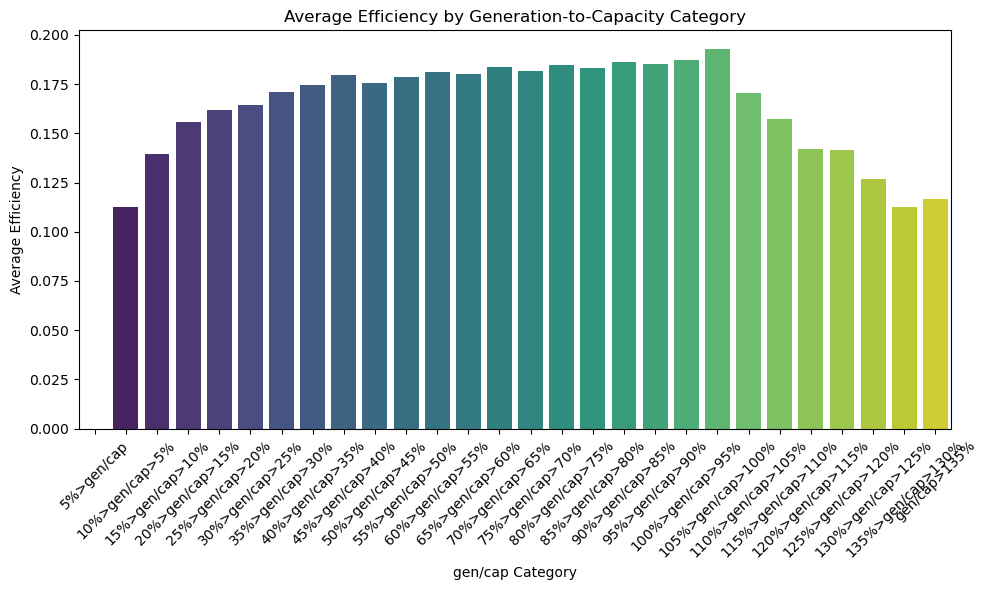

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year-2-11 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


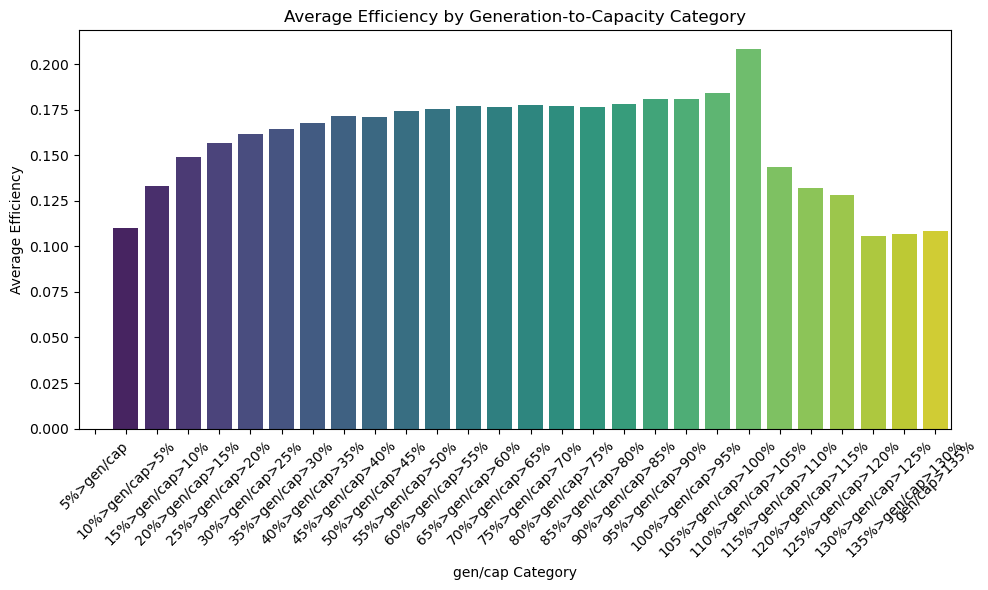

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year-1-13 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


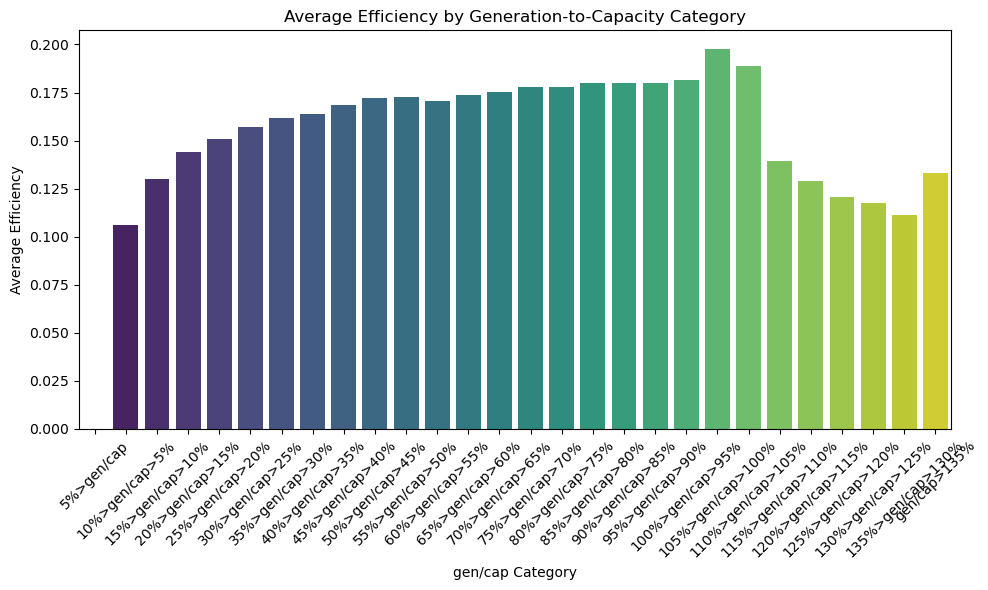

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year0-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


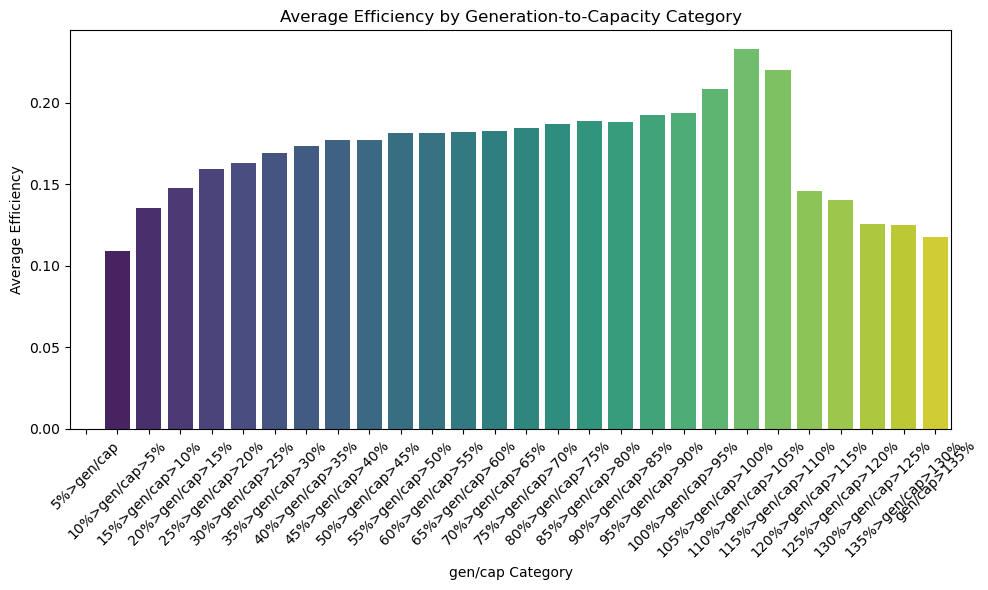

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year1-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


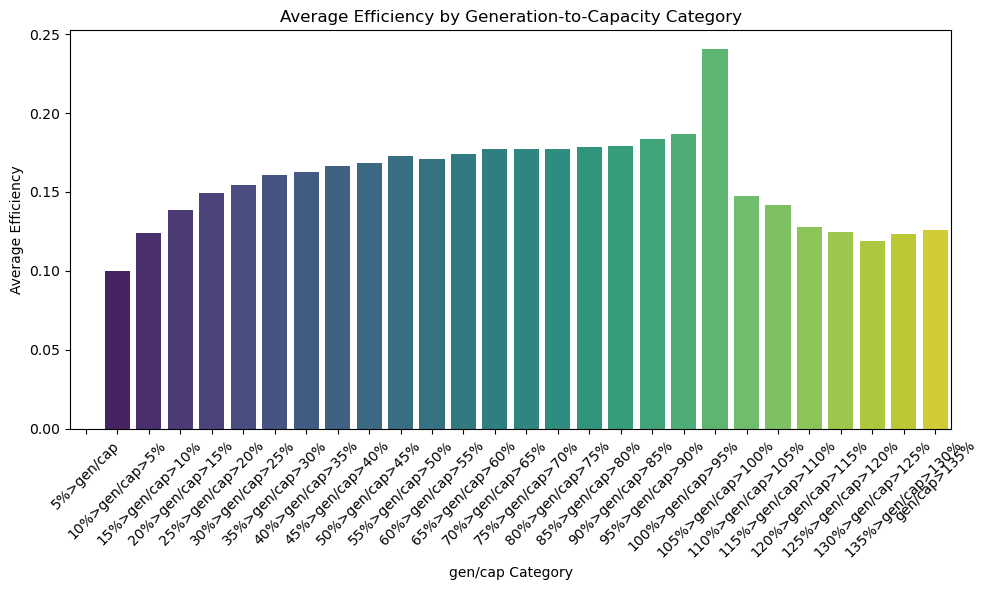

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year2-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


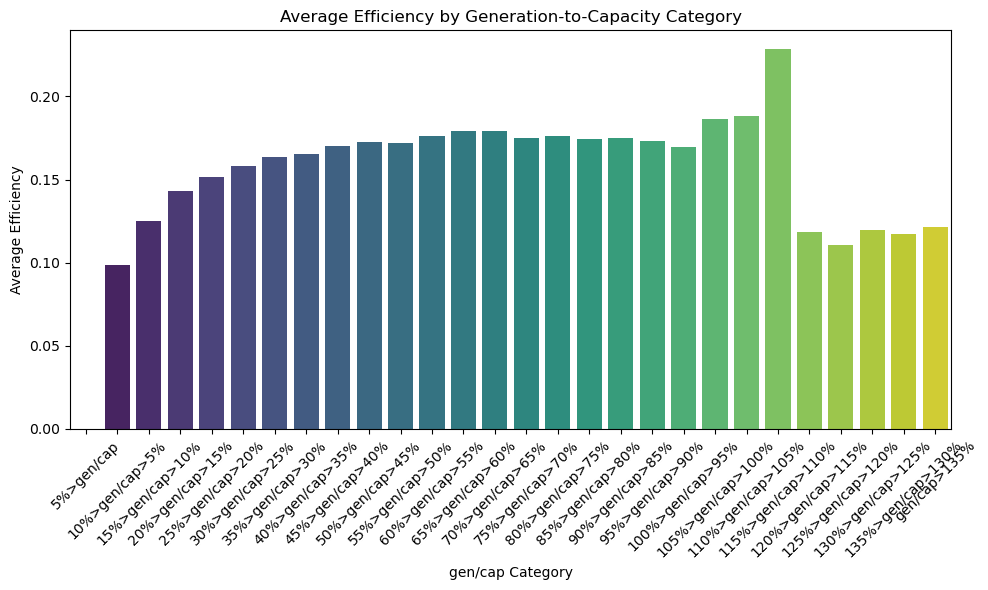

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year3-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


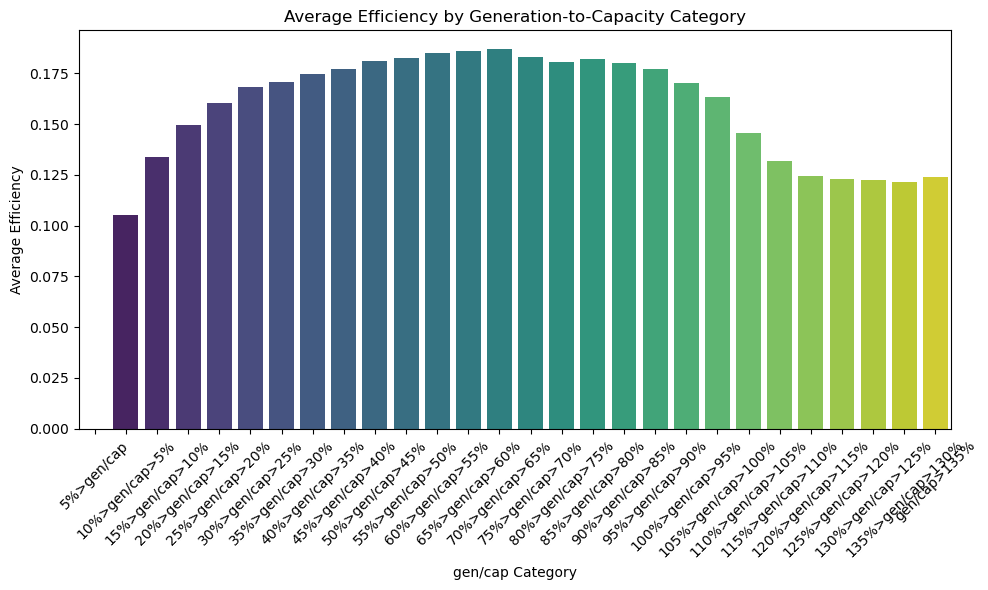

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year4-15 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


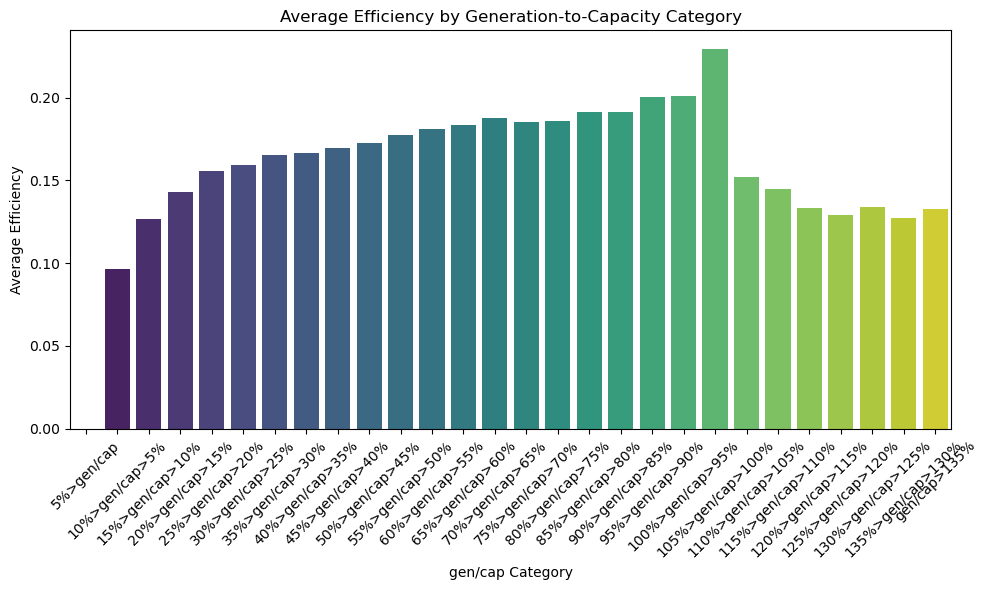

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year5-15 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


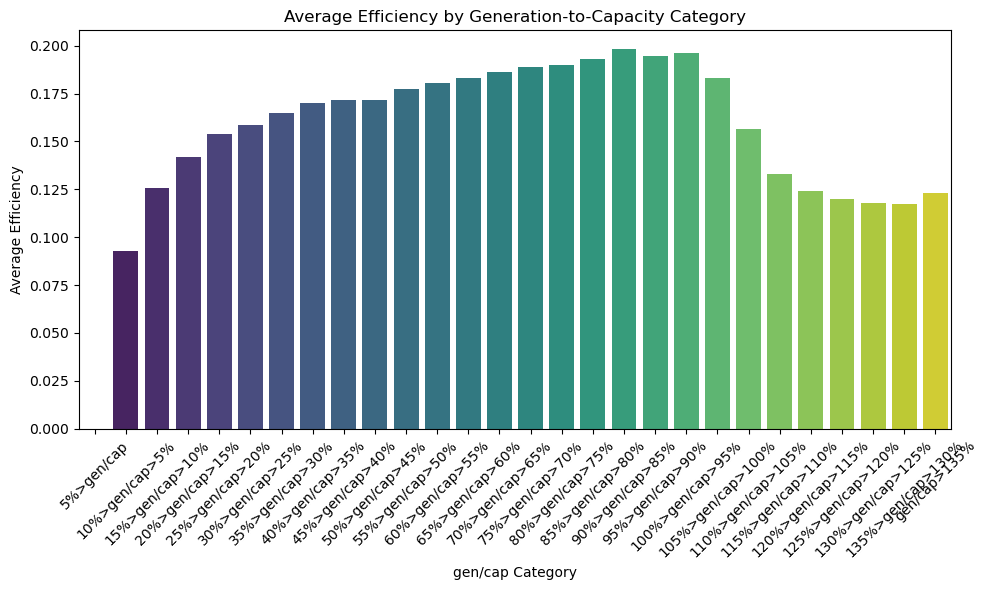

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year6-15 is not there


/home/alireza/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


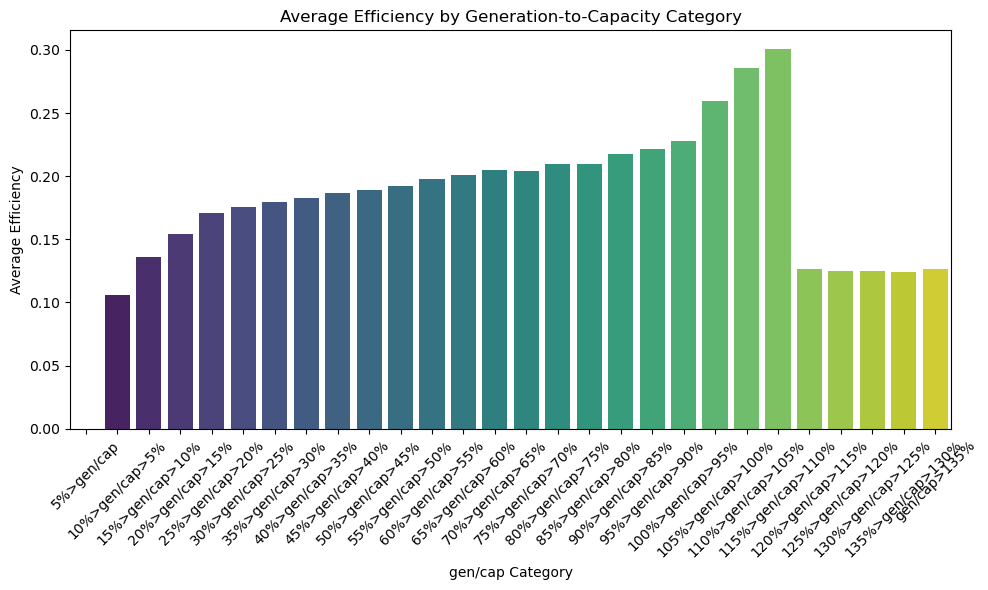

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year7-15 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


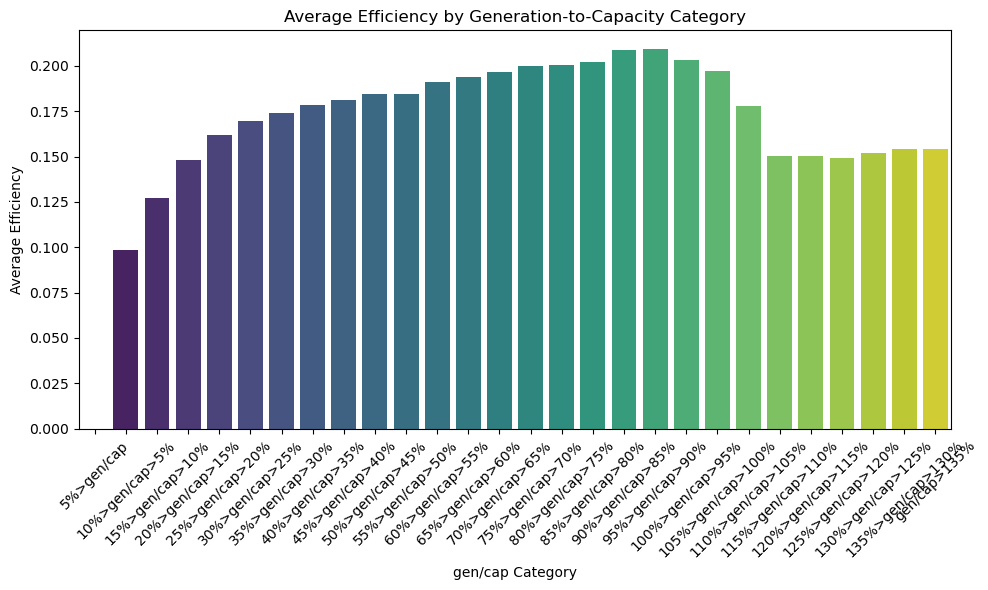

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year8-15 is not there


/home/alireza/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


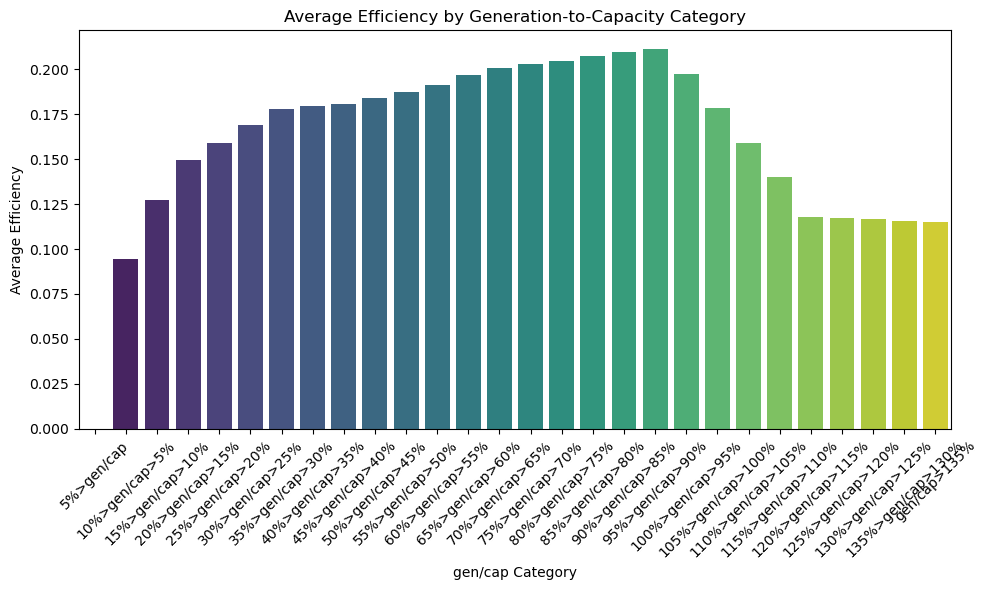

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year9-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


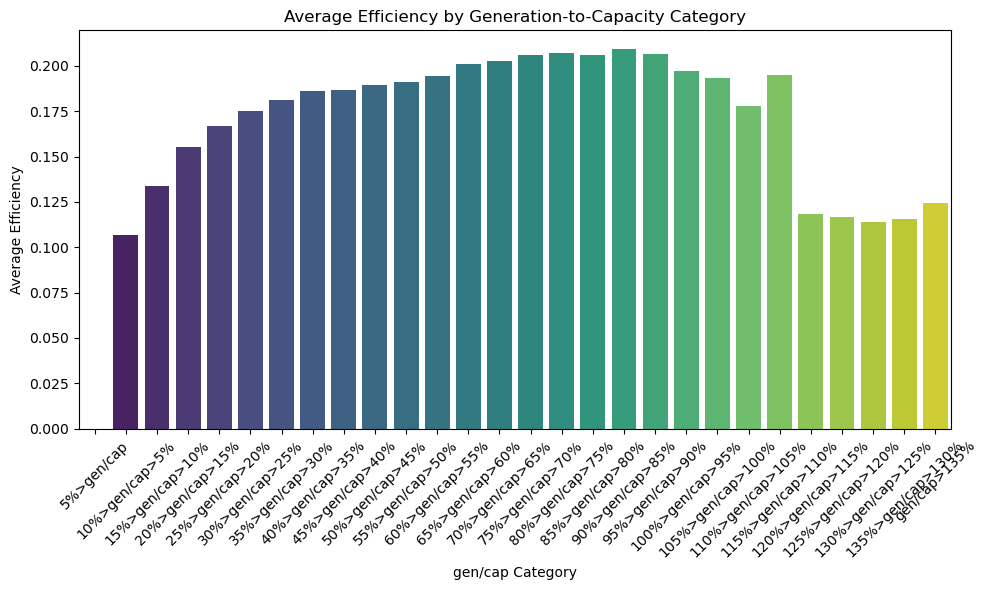

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year10-15 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


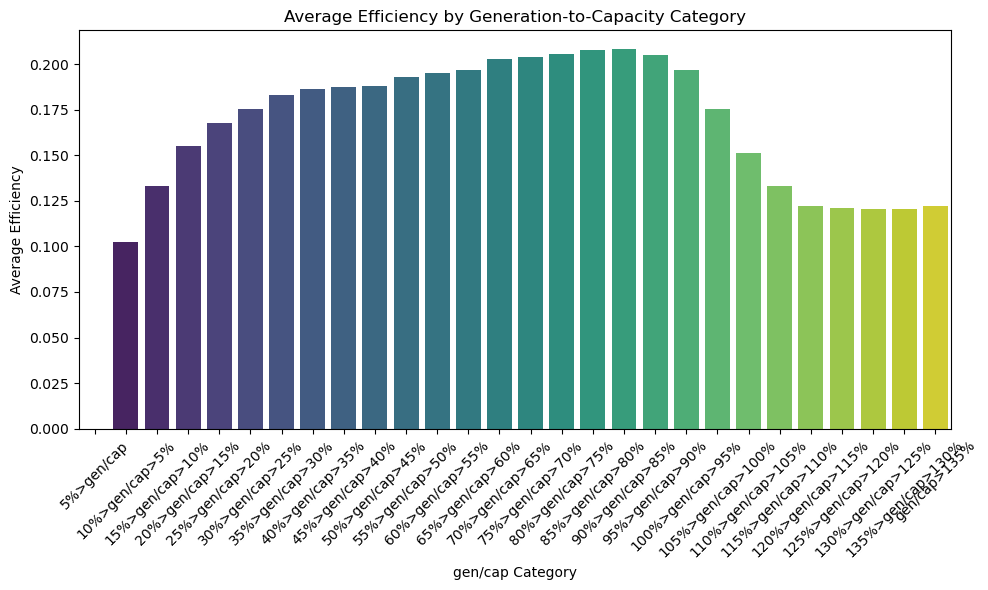

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year11-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


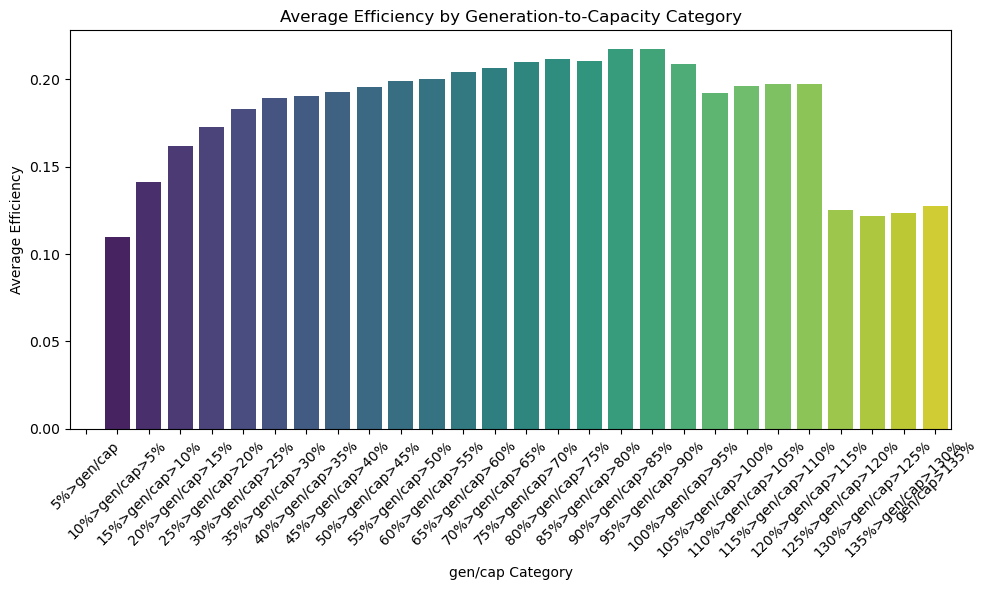

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year12-14 is not there


/home/alireza/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


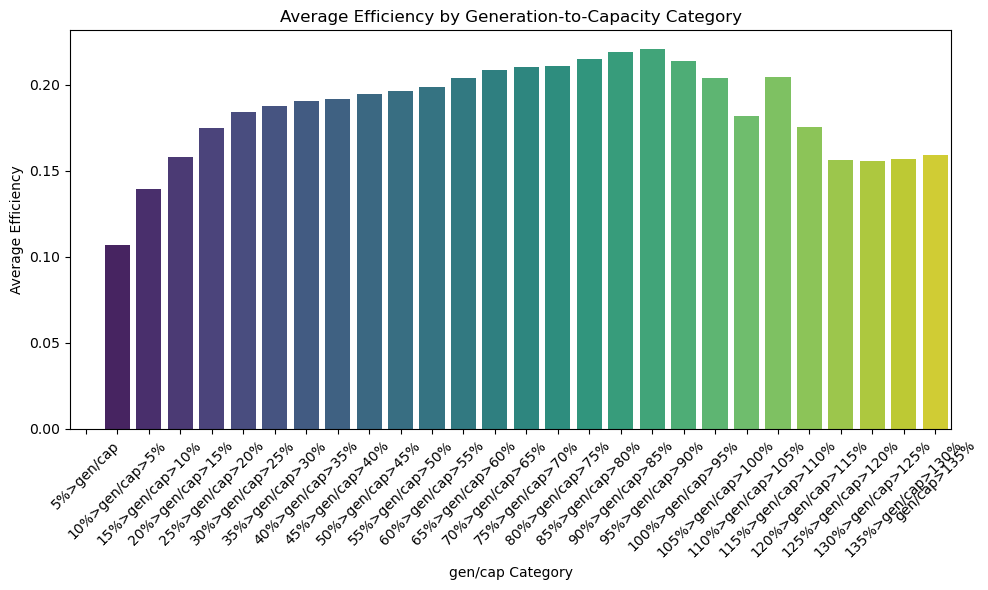

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year13-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


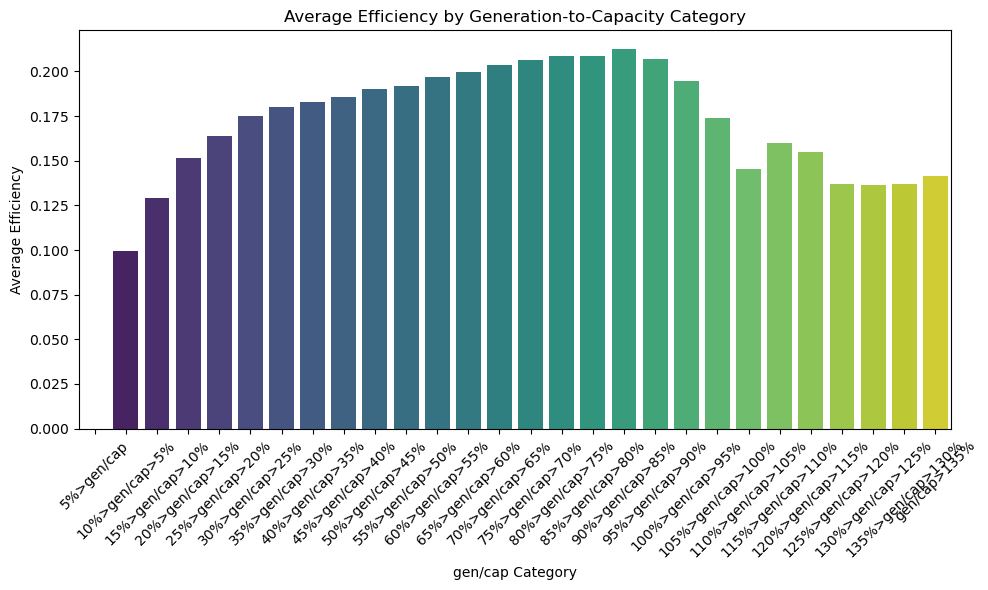

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year14-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


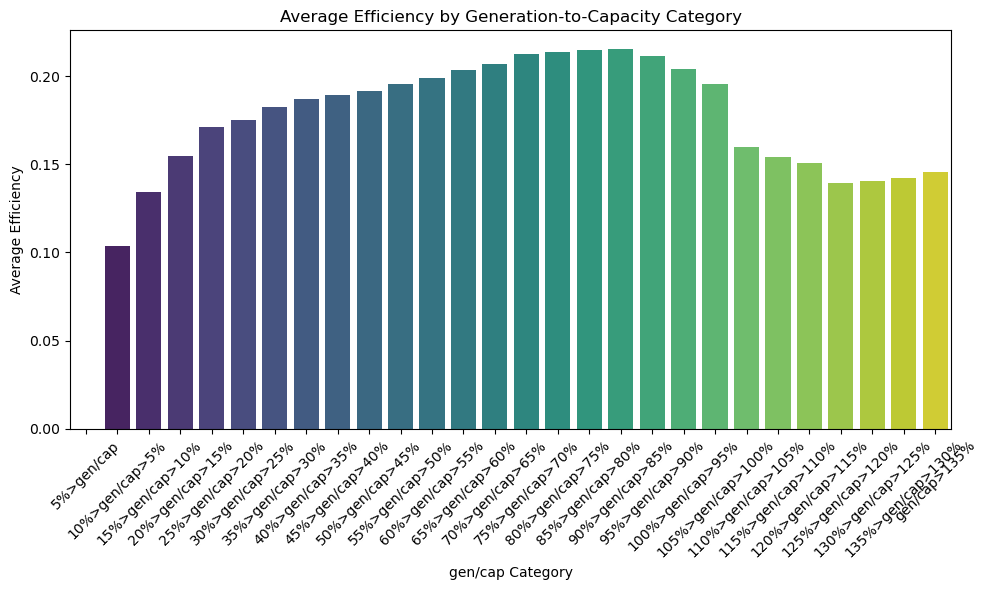

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year15-14 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


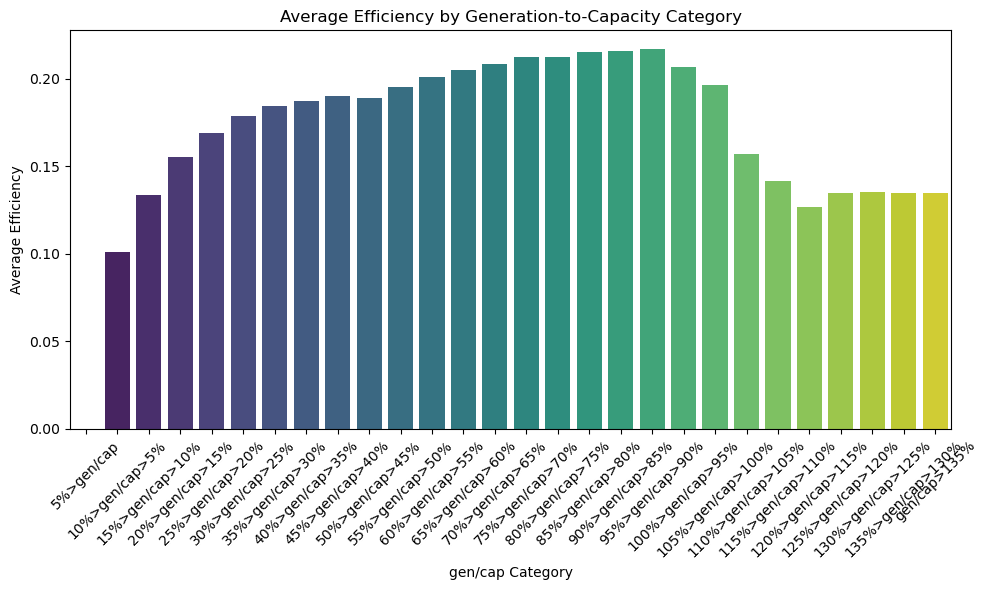

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year16-13 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


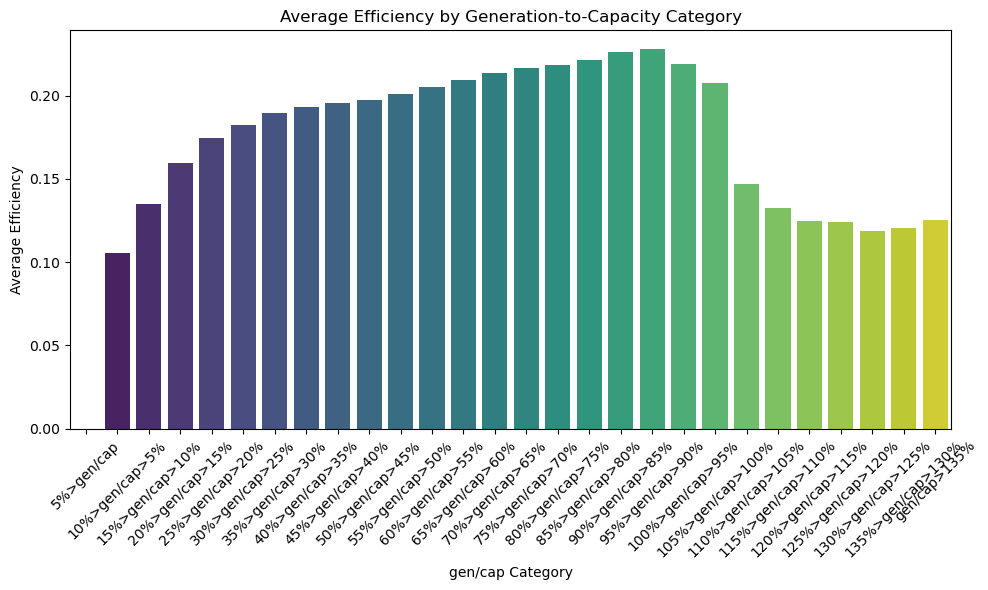

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year17-12 is not there


/home/alireza/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


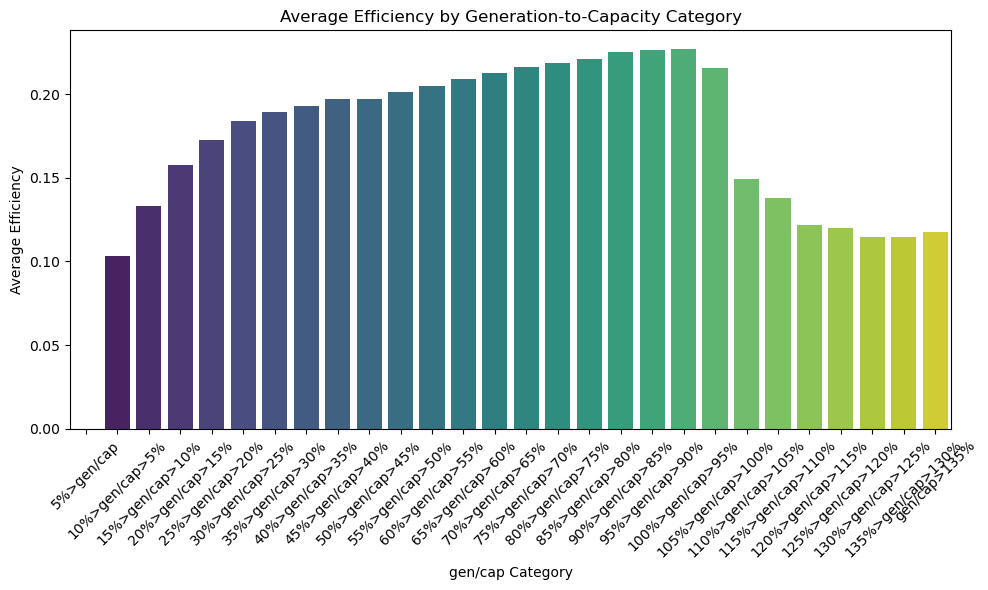

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year18-13 is not there


/home/alireza/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


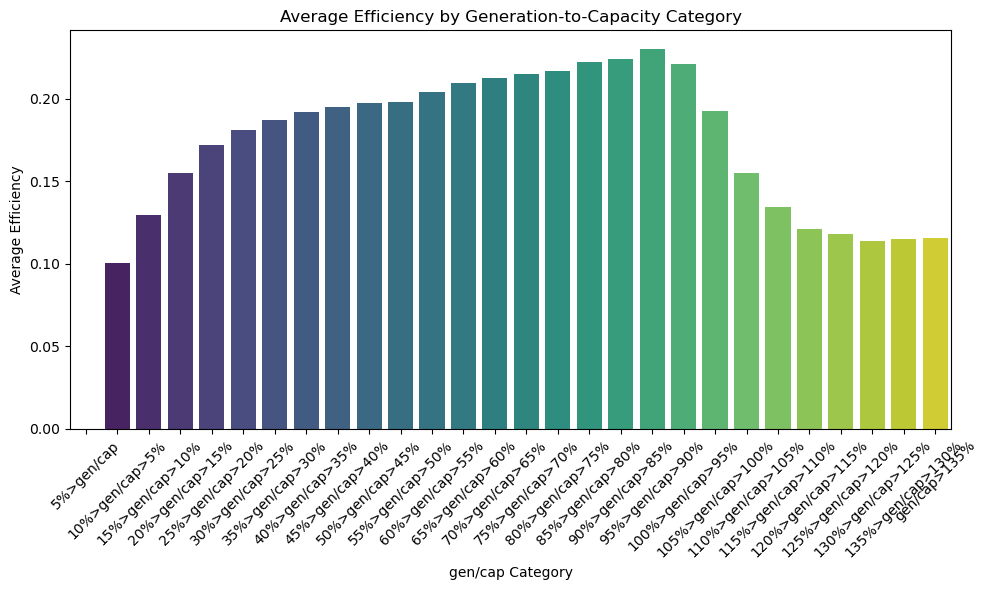

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year19-13 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


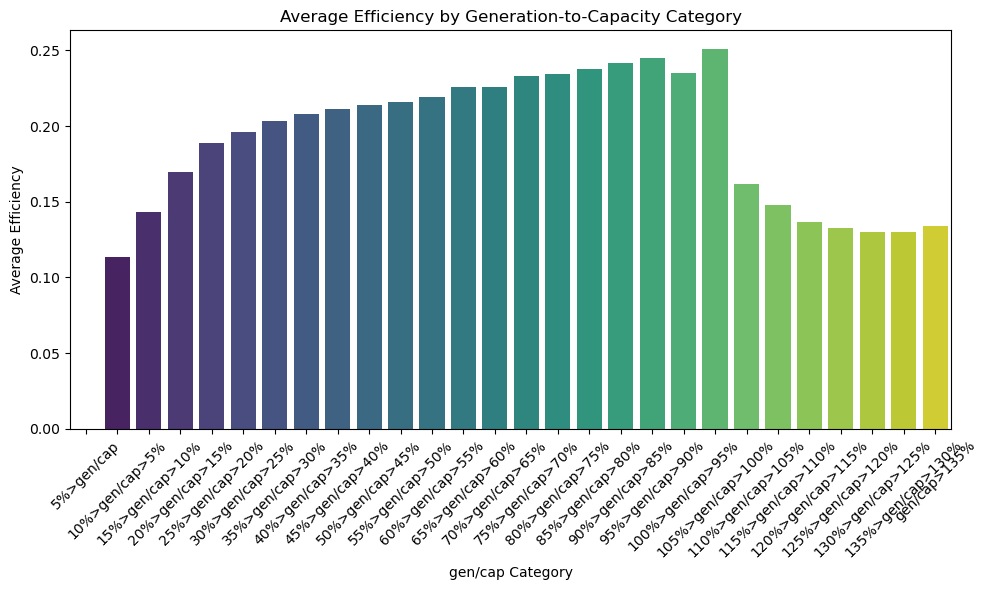

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year20-12 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


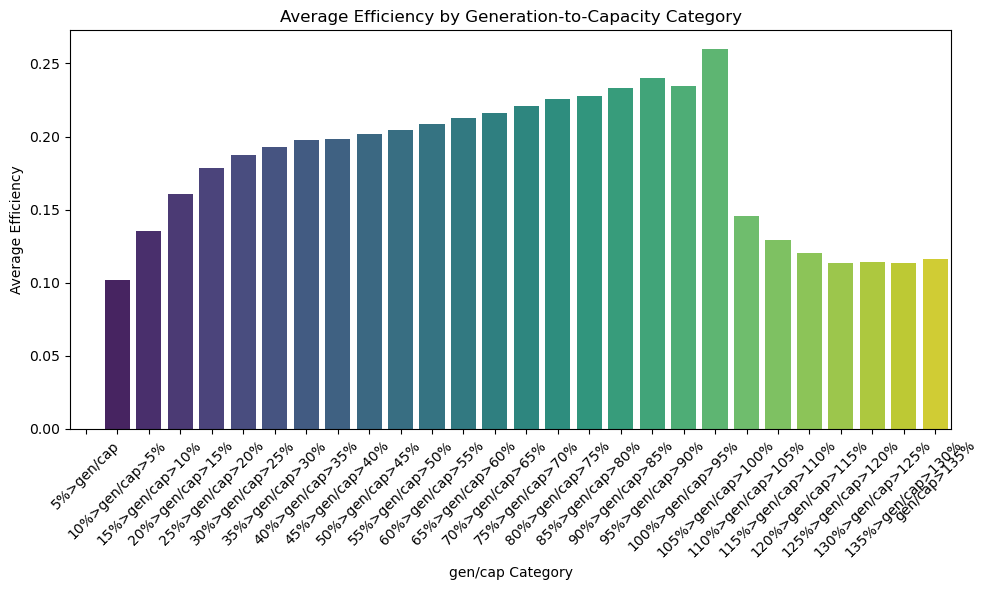

/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
/tmp/ipykernel_1800902/389218312.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

file year21-12 is not there


/tmp/ipykernel_1800902/389218312.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_all, x='category', y='coef_pos', \


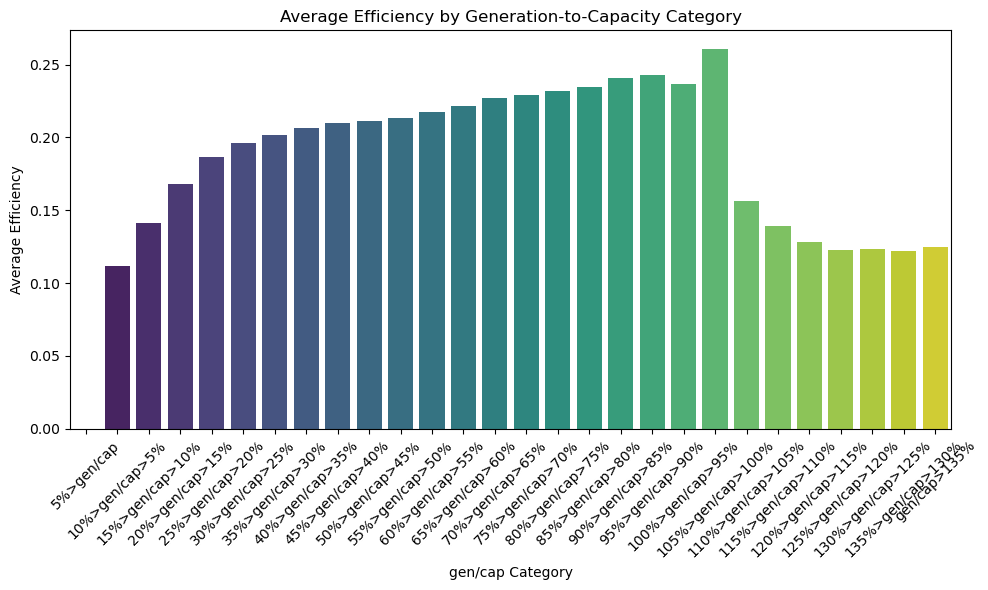

In [171]:
chunksize =1

stata_data = pd.read_stata('~/Documents/GitHub/AMR-project/hourly datasets/fossil_PlantCapacity_allyears.dta')
stata_data = stata_data[stata_data['Namecap_plant']>=20]
load_path = "~/Documents/GitHub/AMR-project/hourly datasets/"+"epa_eia_crosswalk"+".xlsx"
crosswalk_data = pd.read_excel(load_path,sheet_name="epa_eia_crosswalk", index_col=0)

crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Wood","CAMD_FUEL_TYPE"] = "Biofuels & waste"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Diesel Oil","CAMD_FUEL_TYPE"] = "Petroleum"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Diesel Oil","CAMD_FUEL_TYPE"] = "Petroleum"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Pipeline Natural Gas","CAMD_FUEL_TYPE"] = "Natural Gas"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Process Gas","CAMD_FUEL_TYPE"] = "Other Gas"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Residual Oil","CAMD_FUEL_TYPE"] = "Petroleum"
crosswalk_data.loc[crosswalk_data["CAMD_FUEL_TYPE"]=="Tire Derived Fuel","CAMD_FUEL_TYPE"] = "Tire-derived fuels"

crosswalk_data["no plant ID"] = crosswalk_data['EIA_PLANT_ID'].isna().astype(int)
crosswalk_data.loc[crosswalk_data["no plant ID"]==1,'EIA_PLANT_ID'] = crosswalk_data.loc[crosswalk_data["no plant ID"]==1,'CAMD_PLANT_ID']
crosswalk_data = crosswalk_data.rename(columns={'EIA_PLANT_ID': 'PlantID'})

stata_cw_1stmerge = pd.merge(stata_data, crosswalk_data, on='PlantID', how='right')

stata_cw_1stmerge['name_match'] = stata_cw_1stmerge.apply(fuzzy_match, axis=1)
stata_cw_1stmerge.loc[stata_cw_1stmerge['PlantName']=="",'name_match'] = 100

stata_cw_1stmerge["bad match"] = (stata_cw_1stmerge["no plant ID"]==1)*((stata_cw_1stmerge["CAMD_STATE"]!=stata_cw_1stmerge["State"])&\
                                                                        ~((stata_cw_1stmerge["State"]=="")|(stata_cw_1stmerge["State"].isna())))+\
    (stata_cw_1stmerge["no plant ID"]==1)*(stata_cw_1stmerge["CAMD_STATE"]==stata_cw_1stmerge["State"])*\
    (stata_cw_1stmerge["CAMD_FUEL_TYPE"]!=stata_cw_1stmerge["Enertype1"])


stata_cw_1stmerge.loc[stata_cw_1stmerge['name_match']>50,"bad match"] =0

#stata_cw_1stmerge = stata_cw_1stmerge[stata_cw_1stmerge["bad match"]==0]
stata_cw_1stmerge = stata_cw_1stmerge.groupby(['PlantID','CAMD_PLANT_ID','name_match',"bad match","CAMD_STATE","State",\
                                              'CAMD_FACILITY_NAME','PlantName',"CAMD_FUEL_TYPE",'Enertype1'])["no plant ID"].mean().reset_index()

save_path_newcw= "~/Documents/GitHub/AMR-project/hourly datasets/cw_modified.xlsx"
stata_cw_1stmerge.to_excel(save_path_newcw, index=False, engine="openpyxl")

cw_cut_data = stata_cw_1stmerge[['CAMD_PLANT_ID','PlantID','name_match',"bad match"]]

load_path = "~/Documents/GitHub/AMR-project/hourly datasets/maxSteamLoads.xlsx"
maxSteamLoad_all = pd.read_excel(load_path)

#cw_cut_data = cw_cut_data.rename(columns={'EIA_PLANT_ID': 'PlantID'})
for k in range(-5,22):

    year = 2000+k
    stata_time = str(year)+"-01-01"
    stata_data_filtered = stata_data[stata_data["Year"]==pd.Timestamp(stata_time)]
    stata_cw_merged = pd.merge(stata_data_filtered, cw_cut_data, on='PlantID', how='left')
    stata_cw_merged["weird match"] = stata_cw_merged['CAMD_PLANT_ID'].isna()
    stata_cw_merged.loc[stata_cw_merged['CAMD_PLANT_ID'].isna(),'name_match'] = 50
    stata_cw_merged.loc[stata_cw_merged['CAMD_PLANT_ID'].isna(),'bad match'] = 0
    stata_cw_merged.loc[stata_cw_merged['CAMD_PLANT_ID'].isna(),'CAMD_PLANT_ID'] = \
        stata_cw_merged.loc[stata_cw_merged['CAMD_PLANT_ID'].isna(),'PlantID']
    idx = stata_cw_merged.groupby('PlantID')['name_match'].idxmax()
    stata_cw_cleaner = stata_cw_merged.loc[idx]

    df_merged =[]
    

    
    for j in range(0,20):
        try:
            excel_name = 'year'+str(k)+'-'+str(j)
            load_path = "~/Documents/GitHub/AMR-project/hourly datasets/"+excel_name+".xlsx"
            excel_data = pd.read_excel(load_path, index_col=0)
            excel_data["grossLoad"] = excel_data["opTime"]*excel_data["grossLoad"]
            excel_data["steamLoad"] = excel_data["steamLoad"].fillna(0)
            excel_data["steamLoadis"] = excel_data["steamLoad"]*excel_data["opTime"]
            plant_hourly = excel_data.groupby(['stateCode','facilityName','facilityId','date','hour'])[['grossLoad','heatInput','steamLoadis']]\
                .sum().reset_index()
            plant_hourly = plant_hourly.rename(columns={'facilityId': 'CAMD_PLANT_ID'})
            plant_hourly['year'] = year
            
            excel_data_merge = pd.merge(plant_hourly, maxSteamLoad_all, on=['CAMD_PLANT_ID','year'], how='left')
            excel_data_merge['steam_ratio'] = excel_data_merge['steamLoadis']/excel_data_merge['maxSteamLoad']

            

            merged_df = pd.merge(excel_data_merge, stata_cw_cleaner, on='CAMD_PLANT_ID', how='left')

            merged_df = merged_df[(merged_df["grossLoad"]>0)|(merged_df["steam_ratio"]>0)]
            # merged_df = pd.merge(excel_data_merge, stata_cw_merged, on='CAMD_PLANT_ID', how='left')
            merged_df["load_from_steam"] = (merged_df["grossLoad"]==0)&(merged_df["steam_ratio"]>0)
            merged_df["load_from_steam"] = merged_df["load_from_steam"].astype(int)
            
            
            merged_df['use_steam_load'] = merged_df.groupby(['stateCode','facilityName','CAMD_PLANT_ID'])['load_from_steam'].transform('mean')
            merged_df['use_steam_load'] = merged_df['use_steam_load']>0.95
            merged_df['use_steam_load'] = merged_df['use_steam_load'].astype(int)
            merged_df["grossLoad"] = merged_df["grossLoad"] + merged_df['use_steam_load']*merged_df['steam_ratio']*merged_df['Namecap_plant']
    
            merged_df['PlantName'] = merged_df['PlantName'].fillna("")
            ## (merged_df["PlantName"] == merged_df["facilityName"])  | (merged_df["PlantName"] == "") some names are 
            ## the same but in very different order that makes fuzzy match hard too  
            ## merged_df['name_match'] = merged_df.apply(fuzzy_match, axis=1)
            merged_df["name_match"] =  merged_df['heatInput']>0
            # Convert Boolean to integer (1 for match, 0 for no match)
            merged_df["name_match"] = merged_df["name_match"].astype(int)
            merged_df['gen_to_capacity'] =merged_df['grossLoad'] / merged_df['Namecap_plant']
            # Define the conditions
            conditions = [
                merged_df['gen_to_capacity'] > 1.35,
                (merged_df['gen_to_capacity'] > 1.3) & (merged_df['gen_to_capacity'] <= 1.35),
                (merged_df['gen_to_capacity'] > 1.25) & (merged_df['gen_to_capacity'] <= 1.3),
                (merged_df['gen_to_capacity'] > 1.2) & (merged_df['gen_to_capacity'] <= 1.25),
                (merged_df['gen_to_capacity'] > 1.15) & (merged_df['gen_to_capacity'] <= 1.2),
                (merged_df['gen_to_capacity'] > 1.1) & (merged_df['gen_to_capacity'] <= 1.15),
                (merged_df['gen_to_capacity'] > 1.05) & (merged_df['gen_to_capacity'] <= 1.1),
                (merged_df['gen_to_capacity'] > 1.0) & (merged_df['gen_to_capacity'] <= 1.05),
                (merged_df['gen_to_capacity'] > 0.95) & (merged_df['gen_to_capacity'] <= 1.0),
                (merged_df['gen_to_capacity'] > 0.9) & (merged_df['gen_to_capacity'] <= 0.95),
                (merged_df['gen_to_capacity'] > 0.85) & (merged_df['gen_to_capacity'] <= 0.9),
                (merged_df['gen_to_capacity'] > 0.8) & (merged_df['gen_to_capacity'] <= 0.85),
                (merged_df['gen_to_capacity'] > 0.75) & (merged_df['gen_to_capacity'] <= 0.8),
                (merged_df['gen_to_capacity'] > 0.7) & (merged_df['gen_to_capacity'] <= 0.75),
                (merged_df['gen_to_capacity'] > 0.65) & (merged_df['gen_to_capacity'] <= 0.7),
                (merged_df['gen_to_capacity'] > 0.6) & (merged_df['gen_to_capacity'] <= 0.65),
                (merged_df['gen_to_capacity'] > 0.55) & (merged_df['gen_to_capacity'] <= 0.6),
                (merged_df['gen_to_capacity'] > 0.5) & (merged_df['gen_to_capacity'] <= 0.55),
                (merged_df['gen_to_capacity'] > 0.45) & (merged_df['gen_to_capacity'] <= 0.5),
                (merged_df['gen_to_capacity'] > 0.4) & (merged_df['gen_to_capacity'] <= 0.45),
                (merged_df['gen_to_capacity'] > 0.35) & (merged_df['gen_to_capacity'] <= 0.4),
                (merged_df['gen_to_capacity'] > 0.3) & (merged_df['gen_to_capacity'] <= 0.35),
                (merged_df['gen_to_capacity'] > 0.25) & (merged_df['gen_to_capacity'] <= 0.3),
                (merged_df['gen_to_capacity'] > 0.2) & (merged_df['gen_to_capacity'] <= 0.25),
                (merged_df['gen_to_capacity'] > 0.15) & (merged_df['gen_to_capacity'] <= 0.2),
                (merged_df['gen_to_capacity'] > 0.1) & (merged_df['gen_to_capacity'] <= 0.15),
                (merged_df['gen_to_capacity'] > 0.05) & (merged_df['gen_to_capacity'] <= 0.1),
                (merged_df['gen_to_capacity'] <= 0.05)
            ]
    
            # Define the corresponding values
            choices = ['gen/cap>135%','135%>gen/cap>130%','130%>gen/cap>125%', '125%>gen/cap>120%', '120%>gen/cap>115%','115%>gen/cap>110%',\
                       '110%>gen/cap>105%', '105%>gen/cap>100%', '100%>gen/cap>95%','95%>gen/cap>90%',\
                       '90%>gen/cap>85%', '85%>gen/cap>80%', '80%>gen/cap>75%','75%>gen/cap>70%',\
                       '70%>gen/cap>65%', '65%>gen/cap>60%', '60%>gen/cap>55%','55%>gen/cap>50%',\
                       '50%>gen/cap>45%', '45%>gen/cap>40%', '40%>gen/cap>35%','35%>gen/cap>30%',\
                      '30%>gen/cap>25%','25%>gen/cap>20%','20%>gen/cap>15%',\
                      '15%>gen/cap>10%','10%>gen/cap>5%','5%>gen/cap']
            merged_df['gen/cap-cats'] = np.select(conditions, choices, default='unknown')
    
    
            filtered_df = merged_df[(merged_df["name_match"] == 1)]
            filtered_df['efficiency'] = 3.412*filtered_df.loc[:,'grossLoad']/filtered_df.loc[:,'heatInput']
            filtered_df = filtered_df[filtered_df['efficiency']<1]
            # filtered_df = filtered_df[filtered_df['efficiency']>0]
            
            
    
            if j==0:
                df_merged = filtered_df
                
            else:
                df_merged = pd.concat([df_merged, filtered_df], ignore_index=True)
               
                #duplicate_cols = [col for col in df_merged.columns if col.endswith('_from_df2')]
                #df_merged.drop(columns=duplicate_cols, inplace=True)
        except FileNotFoundError:
            print(f"file year{k}-{j} is not there")
            break

    

    df_merged.loc[df_merged['PlantID'].isna(),'PlantID'] = df_merged.loc[df_merged['PlantID'].isna(),'CAMD_PLANT_ID']

    cap_gen_nan = df_merged['gen/cap-cats'].isna()
    df_merged = df_merged[~cap_gen_nan]
    df_merged['CAMD_PLANT_ID'] = df_merged['CAMD_PLANT_ID'].astype(int)
    df_merged_sorted = df_merged.sort_values(by='CAMD_PLANT_ID', ascending=False).reset_index()

    unique_ids_all = df_merged_sorted['CAMD_PLANT_ID'].unique()
    counter = 0
    chunksize =1

    bad_cats = pd.DataFrame({
        'gen/cap-cats':['gen/cap>135%','135%>gen/cap>130%','130%>gen/cap>125%', '125%>gen/cap>120%', '120%>gen/cap>115%','115%>gen/cap>110%',\
                           '110%>gen/cap>105%', '105%>gen/cap>100%']
    })

    good_cats = pd.DataFrame({
        'gen/cap-cats':['100%>gen/cap>95%','95%>gen/cap>90%',\
           '90%>gen/cap>85%', '85%>gen/cap>80%', '80%>gen/cap>75%','75%>gen/cap>70%',\
           '70%>gen/cap>65%']
    })

    labels = np.flip(choices)
    label_to_number = {label: i+1 for i, label in enumerate(labels)}

    
    for id_chunk in chunker(unique_ids_all, chunksize):

        

        # id_chunk = np.array([1595])
        df_chunk = df_merged_sorted[df_merged_sorted['CAMD_PLANT_ID'].isin(id_chunk)].reset_index()
        df_chunk.drop(columns=["index",'level_0'], inplace=True)
        df_chunk["temp_ID"] = df_chunk["CAMD_PLANT_ID"]
        df_chunk = df_chunk[df_chunk["gen/cap-cats"]!="unknown"]
        df_chunk = df_chunk[df_chunk["efficiency"]<0.8]
        id_chunk2 = df_chunk["CAMD_PLANT_ID"].unique()
        # print(id_chunk)
        # Create dummy variables for firm fixed effects
        #df_chunk = pd.get_dummies(df_chunk, columns=['temp_ID'], drop_first=True)

        list_of_cats = df_chunk["gen/cap-cats"].unique()
        to_remove = ['10%>gen/cap>5%','5%>gen/cap']
        
        list_of_cats = list_of_cats[~np.isin(list_of_cats,to_remove)]

        if (len(df_chunk)>24)&(len(list_of_cats)>1):
            df_chunk["date_time"] =  pd.to_datetime(df_chunk['date'], format='%Y-%m-%d')
            df_chunk_sorted = df_chunk.sort_values(by=['CAMD_PLANT_ID','date_time','hour'], ascending=True).reset_index()
            df_chunk_shift = df_chunk_sorted[['grossLoad','CAMD_PLANT_ID',"date_time",'hour']]
            df_chunk_shift = df_chunk_shift.shift(1)
    
            
            df_chunk_shift.loc[0,"CAMD_PLANT_ID"] = df_chunk_shift.loc[1,"CAMD_PLANT_ID"]
            df_chunk_shift.loc[0,"grossLoad"]=0
            df_chunk_shift = df_chunk_shift.rename(columns={'grossLoad': 'grossLoad_prev',"date_time":"date_time_prev",'hour':'hour_prev'})
            
            #chunk_copy = df_chunk_sorted.copy()
            
            df_chunk_sorted[['grossLoad_prev','CAMD_PLANT_ID_prev',"date_time_prev",'hour_prev']] = \
                df_chunk_shift[['grossLoad_prev','CAMD_PLANT_ID',"date_time_prev",'hour_prev']]
            df_chunk_sorted['delta_days'] = (df_chunk_sorted['date_time'] - df_chunk_sorted['date_time_prev']).dt.days
            df_chunk_sorted['delta_hour'] = df_chunk_sorted['hour']-df_chunk_sorted['hour_prev']
            df_chunk_sorted['is_one_day_apart'] = (df_chunk_sorted['delta_days'] <= 1).astype(int)
            df_chunk_sorted['consec_time'] = df_chunk_sorted['is_one_day_apart']*\
                ((df_chunk_sorted['delta_hour']==1)|(df_chunk_sorted['delta_hour']==-23))
            df_chunk_sorted.loc[df_chunk_sorted['consec_time']==0,'grossLoad_prev'] = 0
            df_chunk_sorted['ramp_rate'] = (df_chunk_sorted['grossLoad']-df_chunk_sorted['grossLoad_prev'])/df_chunk_sorted['Namecap_plant']
            df_chunk_sorted.loc[df_chunk_sorted['ramp_rate'].isna(),'ramp_rate'] = 0
            
            # Define the regression formula
            # This includes 'capacity', 'gen_cap_cats', and the firm dummy variables
            #ID_dummies = ["C("+col+")" for col in df_chunk.columns if col.startswith('temp_ID_')]
            #### I'm temporarily changing the code to perform for size 1 chunks
            # formula = 'efficiency ~ C(Q("gen/cap-cats"))+ ramp_rate + ' + ' + C(CAMD_PLANT_ID)' #.join(ID_dummies)
            formula = 'efficiency ~ C(Q("gen/cap-cats"))+ ramp_rate ' 
            model = smf.ols(formula=formula, data=df_chunk_sorted).fit()
            
            # Get the summary frame
            summary_frame = model.summary2().tables[1]
            coefficients = model.params
            
            # Filter rows corresponding to gen/cap-cats dummy variables
            coef_df = summary_frame.filter(like='C(Q("gen/cap-cats"))', axis=0)
            ### these should be uncommented for chunk size>1
            # plant_coefs = summary_frame.filter(like='C(CAMD_PLANT_ID)', axis=0)
            # # correct idexing for the plant coefs
            # plant_coefs = plant_coefs.reset_index().rename(columns={'index': 'PlantID'})
            # plant_coefs['PlantID'] = plant_coefs['PlantID'].str.replace('C(CAMD_PLANT_ID)[T.','',regex=False)
            # plant_coefs['PlantID'] = plant_coefs['PlantID'].str.replace(']','',regex=False)
            # plant_coefs['PlantID'] = plant_coefs['PlantID'].astype(int)
            # id_regres = plant_coefs['PlantID'].unique()
            # id_df1 = pd.DataFrame({
            #     'id_chunk':id_chunk2
            # })
            # id_df2 = pd.DataFrame({
            #     'id_regs': id_regres
            # })
            # unique_ids = id_df1[~id_df1['id_chunk'].isin(id_df2['id_regs'])]['id_chunk']
            # unique_ids = unique_ids[~unique_ids.isna()]
            # unique_ids_list = unique_ids.tolist()
            # plant_coefs.loc[len(plant_coefs),'PlantID'] = unique_ids_list[0]
    
            # plant_coefs.loc[len(plant_coefs)-1,'Coef.'] =0


            
    
            
            ### this line also should be active for the case of chunksize>1
            # plant_coefs['Coef.'] += intercept
            
            
            # Reset index for plotting
            coef_df = coef_df.reset_index().rename(columns={'index': 'category'})
            coef_df['category'] = coef_df['category'].str.replace('C(Q("gen/cap-cats"))[T.','',regex=False)
            coef_df['category'] = coef_df['category'].str.replace(']','',regex=False)
            ### the next two lines seem unnecessary now that we have more detailed regression
            # reference_category = pd.DataFrame({'category': ['100%>gen/cap>95%'], 'Coef.': [0]})
            # coef_df = pd.concat([coef_df, reference_category], ignore_index=True)
            
            #coef_df['category'] = pd.Categorical(df['category'], categories=category_order, ordered=True)
            #coef_df['coef_pos'] = coef_df['Coef.'] - min(coef_df['Coef.'])

            #### in chunk size 1 regression this part should be done now for cap/gen coeffs
            coef_regres = coef_df['category'].unique()
            id_df1 = pd.DataFrame({
                'gencap_chunk':df_chunk["gen/cap-cats"].unique()
            })
            id_df2 = pd.DataFrame({
                'gencap_regs': coef_regres
            })
            unique_gencaps = id_df1[~id_df1['gencap_chunk'].isin(id_df2['gencap_regs'])]['gencap_chunk']
            unique_gencaps = unique_gencaps[~unique_gencaps.isna()]
            unique_gencaps_list = unique_gencaps.tolist()
            
            

            
            
            intercept = model.params['Intercept']


            coef_df['Coef.'] += intercept
            if len(coef_df.loc[~coef_df['category'].isin(bad_cats['gen/cap-cats']),'Coef.'])>0:
                max_coef = max(coef_df.loc[~coef_df['category'].isin(bad_cats['gen/cap-cats']),'Coef.'])
                
            

            coef_df.loc[len(coef_df),'category'] = unique_gencaps_list[0]
            coef_df.loc[len(coef_df)-1,'Coef.'] = intercept
            coef_df['Coef.'] -= intercept

            
            
            isnan_temp = coef_df['Coef.'].isna()
            coef_df.loc[isnan_temp,'Coef.'] = 0
            coef_df.loc[isnan_temp,'Coef.'] = min(coef_df['Coef.'])


            if len(coef_df[coef_df['category'].isin(good_cats['gen/cap-cats'])])==0:
                # Known function values (partial)
                known_labels = coef_df['category']
                function_values = coef_df['Coef.'] + intercept
                
                # Convert labels to numeric x values using the dictionary
                x_known = np.array([label_to_number[label] for label in known_labels])  
                
                # Build interpolation function with extrapolation
                f_interp = interpolate.interp1d(x_known, function_values, kind='linear', fill_value='extrapolate')
                
                # Extrapolate to position 9 (e.g., label at position 9 if it existed)
                x_target = label_to_number['95%>gen/cap>90%']
                max_coef_temp = float(f_interp(x_target))
                if max_coef_temp>max_coef:
                    max_coef = max_coef_temp
                            
    
            plant_coefs = pd.DataFrame({
                'PlantID':id_chunk,
                'Coef.': [max_coef],
                'intercept': [intercept]
            })

            
            # Display the regression results
            #print(model.summary())
            counter +=1
            
            if counter==1:
                coef_all = coef_df.copy()
                plant_coef_all = plant_coefs.copy()
                
            else:
    
                plant_coef_all = pd.concat([plant_coef_all, plant_coefs], ignore_index=True)
                coef_all = pd.merge(coef_all, coef_df, on="category",\
                                        how='outer', suffixes=('', '_from_df2'))
                # coef_all = coef_all.combine_first(coef_df)
                duplicate_cols = [col for col in coef_all.columns if col.endswith('_from_df2')]
                non_dupli_cols = [col for col in coef_all.columns if col not in duplicate_cols and col != 'category']
                coef_all.loc[coef_all["Coef._from_df2"].isna(),duplicate_cols] = \
                    (coef_all.loc[coef_all["Coef._from_df2"].isna(),non_dupli_cols].reset_index(drop=True).values)/(counter-1)
                
                coef_all.loc[coef_all["Coef."].isna(),non_dupli_cols] \
                    = (coef_all.loc[coef_all["Coef."].isna(),duplicate_cols].reset_index(drop=True).values)
                
                if coef_all['Coef.'].isna().any():
                    print('break')
                    break
                for column in coef_df.columns:
                    if column != "category":
                        coef_all[column] = coef_all[[column, column+'_from_df2']].sum(axis=1, skipna=False)
                
                
                coef_all.drop(columns=duplicate_cols, inplace=True)

        

       

        # if id_chunk==7063:
        #     coef_df['Coef.'] += intercept
        #     print("stop")
        #     break;
    for column in coef_df.columns:
        if column != "category":
            coef_all[column] = coef_all[column]/counter
    nan_index = coef_all['Coef.'].isna()

    coef_all.loc[nan_index,'Coef.'] = 0
    coef_all.loc[nan_index,'Coef.'] = min(coef_all['Coef.'])
    coef_all['coef_pos'] = coef_all['Coef.'] - min(coef_all['Coef.'])
    #coef_all.loc[coef_all['Std.Err.'].isna(),'coef_pos'] = nan

    category_order = choices.copy()
    category_order.reverse()
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_all, x='category', y='coef_pos', \
                 order=category_order,errorbar=None, palette='viridis')
    
    # Customize labels and title
    plt.title('Average Efficiency by Generation-to-Capacity Category')
    plt.xlabel('gen/cap Category')
    plt.ylabel('Average Efficiency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    save_path_cap_gen = "~/Documents/GitHub/AMR-project/hourly datasets/cap_gen_year"+str(k)+"final.xlsx"
    save_path_pantID = "~/Documents/GitHub/AMR-project/hourly datasets/PlantID_year"+str(k)+"final.xlsx"
    coef_all.to_excel(save_path_cap_gen, index=False, engine="openpyxl")
    plant_coef_all.to_excel(save_path_pantID, index=False, engine="openpyxl")
    

In [169]:
# df_merged.to_pickle("~/Documents/GitHub/AMR-project/hourly datasets/df_merged_pickle.pkl")
# df_merged = pd.read_pickle("~/Documents/GitHub/AMR-project/hourly datasets/df_merged_pickle.pkl")

# test = pd.merge(df_merged, maxSteamLoad_all, on=['CAMD_PLANT_ID','year'], how='left')
# test[(test['date']=='1997-02-07')&(test['hour']==7)&(test['CAMD_PLANT_ID']==1595)]
# merged_df\
# maxSteamLoad_all
# df_merged[(df_merged['CAMD_PLANT_ID']==1004)]
# len(coef_df[coef_df['category'].isin(good_cats['gen/cap-cats'])])==0
# known_labels = coef_df['category']
# function_values = coef_df['Coef.']  

# # Convert labels to numeric x values using the dictionary
# x_known = np.array([label_to_number[label] for label in known_labels])  

# # Build interpolation function with extrapolation
# f_interp = interpolate.interp1d(x_known, function_values, kind='linear', fill_value='extrapolate')

# # Extrapolate to position 9 (e.g., label at position 9 if it existed)
# x_target = label_to_number['95%>gen/cap>90%']
# max_coef = f_interp(x_target)

# float(max_coef)
coef_df['Coef.'] -= intercept
coef_df
# x_target
# [x_known,function_values]

,category,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,100%>gen/cap>95%,0.561380,0.062142,9.033855,2.227046e-18,0.439339,0.683421
1,105%>gen/cap>100%,0.541774,0.157554,3.438653,6.249311e-04,0.232353,0.851196
2,15%>gen/cap>10%,0.236407,0.035580,6.644476,6.810861e-11,0.166532,0.306282
3,20%>gen/cap>15%,0.189986,0.034360,5.529348,4.791830e-08,0.122507,0.257465
4,25%>gen/cap>20%,0.263168,0.035104,7.496746,2.347441e-13,0.194226,0.332109
5,30%>gen/cap>25%,0.303637,0.033941,8.945954,4.508195e-18,0.236979,0.370294
6,35%>gen/cap>30%,0.366203,0.039413,9.291541,2.736577e-19,0.288801,0.443606
7,40%>gen/cap>35%,0.414338,0.038194,10.848334,3.603027e-25,0.339329,0.489347
8,45%>gen/cap>40%,0.449492,0.042090,10.679383,1.677911e-24,0.366831,0.532152
9,5%>gen/cap,-0.049349,0.046571,-1.059639,2.897333e-01,-0.140810,0.042113


In [29]:
# excel_data_merge[(excel_data_merge['date']=='1997-01-07')&(excel_data_merge['hour']==7)&(excel_data_merge['CAMD_PLANT_ID']==1595)]
stata_cw_cleaner
test2 = pd.merge(excel_data_merge, stata_cw_cleaner, on='CAMD_PLANT_ID', how='left')

test2[(test2['date']=='1997-01-07')&(test2['hour']==7)&(test2['CAMD_PLANT_ID']==1595)]
stata_cw_merged

,PlantID,PlantName,State,Technology,PrimeMover,EnergySource1,Year,Enertype1,Summercap_plant,Wintercap_plant,Namecap_plant,CAMD_PLANT_ID,name_match,bad match,weird match
0,7,,,,ST,BIT,1997-01-01,Coal,132.899994,132.899994,138.000000,7.0,100.0,0,False
1,7,,,,ST,BIT,1997-01-01,Coal,132.899994,132.899994,138.000000,7.0,100.0,0,False
2,7,,,,ST,BIT,1997-01-01,Coal,132.899994,132.899994,138.000000,7.0,100.0,0,False
3,9,,,,GT,NG,1997-01-01,Natural Gas,69.000000,71.000000,80.550003,9.0,100.0,0,False
4,9,,,,GT,NG,1997-01-01,Natural Gas,69.000000,71.000000,80.550003,9.0,100.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,8226,,,,ST,BIT,1997-01-01,Coal,562.000000,570.000000,565.000000,8226.0,100.0,0,False
1898,8227,,,,GT,FO2,1997-01-01,Petroleum,160.000000,208.000000,156.800003,8227.0,96.0,0,False
1899,8227,,,,GT,FO2,1997-01-01,Petroleum,160.000000,208.000000,156.800003,8227.0,100.0,0,False
1900,8227,,,,GT,FO2,1997-01-01,Petroleum,160.000000,208.000000,156.800003,8227.0,100.0,0,False


In [111]:
# df_chunk['PlantID'].unique()
# unique_ids_list
# df_chunk["PlantID"].unique().astype(int)
# plant_coefs
# coef_df

In [573]:
# coef_all
# unique_ids